In [1]:
# 回归是估计输入数据与连续输出数据之间关系的过程。数据通常是实数形式的，我们的目标是估计满足输入到输出映射关系的基本函数。
# 线性回归的目标是提取输入变量与输出变量的关联线性模型，这就要求实际输出与线性方程预测的输出的的残差平方和最小化。
# 残差平方和（sum of squares of differences)，这种方法被称为普通最小二乘法（Ordinary Least Squares，OLS）

# 先准备一些数据点

with open('data_singlevar.txt', 'r') as f:
    lines = f.readlines()

In [2]:
import sys
import numpy as np
X = []
y = []

for line in lines:
    xt, yt = [float(i) for i in line.split(',')]
    X.append(xt)
    y.append(yt)

In [3]:
# 建立机器学习模型的时候，需要一种方法来验证模型，检查模型是否达到一定的满意度（satisfactory level）
# 为了实现这个验证，我们把数据分成两组：训练数据集（training dataset）与测试数据集（testing dataset）

num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# training dataset
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# testing dataset
X_test = np.array(X[num_training:]).reshape((num_test, 1))
y_test = np.array(y[num_training:])

In [4]:
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

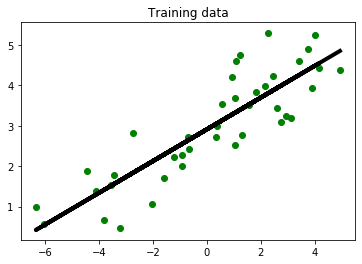

In [7]:
import matplotlib.pyplot as plt

y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

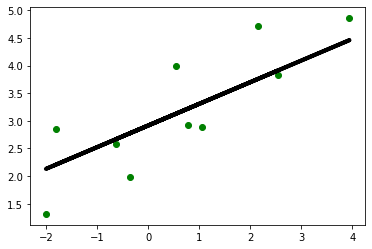

In [6]:
y_test_pred = linear_regressor.predict(X_test)

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.show()

In [8]:
# 衡量回归器好坏的指标
# 平均绝对误差（mean absolute error）
#   这是给定数据集的所有数据点的绝对误差的平均值
# 均方误差（mean squared error)
#   这是给定数据集的所有数据点的误差的平方的平均值
# 中位数绝对误差（median absolute error）
#   这是给定数据集的所有数据点的误差的中位数。这个指标的主要优点是可以消除异常值的干扰。
#   测试数据中的单个坏点不会影响整个误差指标，均值误差指标会受到异常点的影响
# 解释方差分数（explained variance score）
#   这个分数用于衡量模型对数据集波动的解释能力，如果得分为1.0分，则表明模型是完美的
# R方得分（R2 score）
#   指确定性相关系数，用于衡量模型对未知样本的预测效果，最好的得分是1.0，其值也可能是负数

import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explained variance score = 0.68
R2 score = 0.68


In [9]:
# 将模型保存成文件

import pickle

output_model_file = 'saved_model.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

In [10]:
# 从文件加载模型

import pickle

with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))


New mean absolute error = 0.54
